# INF391 - Tarea 3

A continuación, se demuestra que single-link es capaz de detectar y agrupar los dos círculos concéntricos en clusters diferentes. ¿Es posible lograr esta agrupación utilizando BIRCH?. Si la respuesta es negativa, ¿qué característica del algoritmo lo impide?.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import Birch, AgglomerativeClustering

In [3]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X, y = noisy_circles

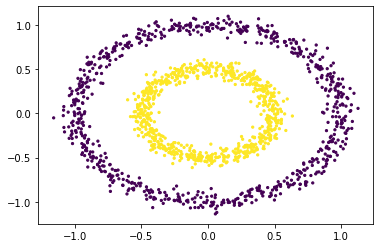

In [4]:
clustering = AgglomerativeClustering(linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], s=5, c=clustering.labels_)
plt.show()

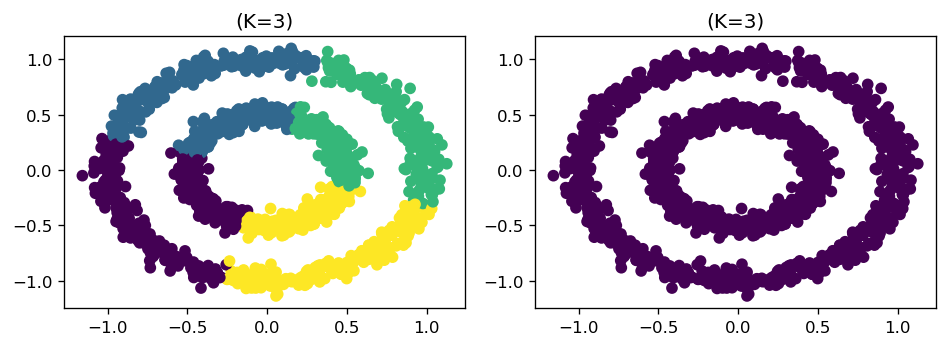

In [9]:

brc = Birch(n_clusters=None,threshold = 0.5)
brc.fit(X)
brc.predict(X)

brc2 = Birch(n_clusters=None,threshold = 1)
brc2.fit(X)
brc2.predict(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)

# Plot
ax1.scatter(X[:, 0], X[:, 1], c=brc.labels_) 
ax2.scatter(X[:, 0], X[:, 1], c=brc2.labels_)


ax1.set_title('(R=0.5)')
ax2.set_title('(R=1)')


plt.tight_layout()
plt.show()



Es posible notar que variando el parámetro del radio, BIRCH va a intentar clusterizar generando circulos en los datos y así generar los cluster necesarios, sin embargo, para este caso, es imposible generar un radio que cubra el anillo exterior sin que cubra el anillo inferior, como es posible apreciar en la imagen de la derecha, mientras que si intentas generar un radio mas pequeño para cubrir el anillo central, ocurre lo de la imagen de la izquierda donde el cluster adquiere datos del anillo exterior. Por lo tanto, utilizando unicamente BIRCH es imposible generar este tipo de agrupaciones.